# Lift Gradient of a finite wing. Effect of stretching 

In [65]:
%matplotlib inline
%run ./resources/init.py

Let us calculate the lift gradient $C_{L\alpha}$ of a finite wing and check the effect of the wing lenght.
Let us assign the wing planform shape, i.e. let us assume given values of wing span $b$,tip chord lenght $c_\mathrm{t}$ and root chord lenght $c_\mathrm{r}$ .
In python let us define the following variables : 

In [66]:
c_r = 5.20; c_t=2.34; taper_ratio = c_t/c_r ;
b= 26.80 ; S = (c_r + c_t)*b/2 ; AR=b*b/S;
cl_alpha_root=6.15; cl_alpha_tip=6.05

In [67]:
Latex(
  r'\begin{array}{rl}'
    +  r'\text{Wing Span,}\, b: & ' + r'{0:.4}'.format(b) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{Reference Surface,}\, S: & ' + r'{0:.5}'.format(S) + r'\,\text{m}^2'
    +  r'\\'
    +  r'\text{Tip Chord,}\, c_\mathrm{t}: & ' + r'{0}'.format(c_t) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{Root Chord,}\, c_\mathrm{r}: & ' + r'{0}'.format(c_r) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{Aspect Ratio,}\, AR: & ' + r'{0:.4}'.format(AR) 
    +  r'\\'
  +r'\end{array}'
    )

<IPython.core.display.Latex object>

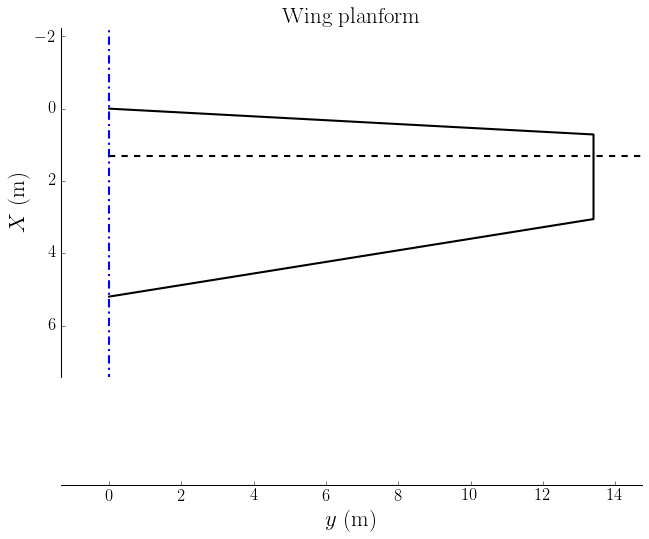

In [68]:
plot_planform(c_r,c_t,b)

The law of the chord is:
\begin{equation}
c(Y)=A_cY+B_c
\end{equation}

The law of $C_{\ell\alpha}$ is:
\begin{equation}
C_{\ell,\alpha}=A_{C_{\ell\alpha}}Y+B_{C_{\ell\alpha}}
\end{equation}

Let's calculate the coefficient:

In [69]:
A_c=2*(c_t-c_r)/b
B_c=c_r

So we have:

In [70]:
Latex(r'\begin{array}{ll}'
        +r'\\'
        + r'A_c=\dfrac{c_t-c_r}{b/2}=' 
        + r'{0:.3}' .format(A_c)
        + r'\\'     
        + r'B_c=c_r='
        + r'{0:.3}'.format(B_c)
        + r'\, \text{m}'
       + r'\end{array}'
        )

<IPython.core.display.Latex object>

So we have:

In [71]:
display(Math(r'c(y) =\,' + '{0:.3}'.format(A_c) + '\,y + ' + '{0:.3}'.format(B_c) + r'\,\text{m}'))

<IPython.core.display.Math object>

In [72]:
A_clalpha=2*(cl_alpha_tip-cl_alpha_root)/b
B_clalpha=cl_alpha_root

In [73]:
Latex(r'\begin{array}{ll}'
        +r'\\'
        + r'A_{C_{\ell\alpha}}=\dfrac{C_{\ell\alpha,t}-C_{\ell\alpha,r}}{b/2}=' 
        + r'{0:.3}' .format(A_clalpha)
        + r'\, (\text{rad m})^{-1}'
        + r'\\'     
        + r'B_{C_{\ell\alpha}}=C_{\ell\alpha,r}='
        + r'{0:.3}'.format(B_clalpha)
        + r'\, \text{rad}^{-1}'
       + r'\end{array}'
        )

<IPython.core.display.Latex object>

So we have:

In [74]:
display(Math(r'C_{\ell\alpha}(Y) =\,' + '{0:.3}'.format(A_clalpha) + r'( \text{rad m})^{-1}\,y + ' + '{0:.3}'.format(B_clalpha) + r'\,\text{rad}^{-1}'))

<IPython.core.display.Math object>

We can now calculate an average gradient:

In [75]:
c_lalphabar=integrate_clalpha_mean(A_c,B_c,A_clalpha,B_clalpha,b,S)[0]
display(Math(r'\bar{C_{\ell\alpha}} = '+ '{0:.4}'.format(c_lalphabar) +'\,\mathrm{rad}^{-1}'))

<IPython.core.display.Math object>

In [76]:
c_lalphabar_law_integral_indefinite=integrate_clalpha_mean(A_c,B_c,A_clalpha,B_clalpha,b,S)[1]
display_workflow_c_lalphabar(S,b,A_clalpha,B_clalpha,A_c,B_c,c_lalphabar_law_integral_indefinite,c_lalphabar)

<IPython.core.display.Latex object>

In [77]:
eW=0.9
CLalpha=c_lalphabar/(1+c_lalphabar/(3.14*AR*eW))
Latex( 
  r'\begin{equation}'
    + r'C_{L\alpha}=\dfrac{\bar{C}_{\ell\alpha}}{1+\dfrac{\bar{C}_{\ell\alpha}}{\pi AR e_W}}='
    + r'\dfrac{'
    + r'{0:.4}' .format(c_lalphabar)
    + r'\, \text{rad}^{-1}}{1+\dfrac{'
    + r'{0:.4}' .format(c_lalphabar)
    + r'\, \text{rad}^{-1}}{3.14\cdot'
    + r'{0:.3}' .format(AR)
    + r'\cdot'
    + r'{0:.3}'.format(eW)
    + r'}}=' 
    + r'{0:.4}' .format(CLalpha)
    + r'\,\text{rad}^{-1}'
  + r'\end{equation}'
)

<IPython.core.display.Latex object>

Let us consider a wing with the same $c_\mathrm{r}$ and taper ratio $\lambda$ but with a different wing span, that we'll call $b'$ , that equals to $b$ reduced by 20%.

In [78]:
b1= b-0.20*b  
S1=(c_r + c_t)*b1/2 
AR1=b1*b1/S1

In [79]:
display(Math(r'\text{Wing span:}\quad b_1 = '+ '{0:.3}'.format(b1) +r'\,\text{m}'))
display(Math(r'\text{Aspect ratio:}\quad AR_1 = '+ '{0:.3}'.format(AR1)))
display(Math(r'\text{surface:}\quad S_1 = '+ '{0:.4}'.format(S1) +'\,\mathrm{m}^2'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [80]:
A_c1=2*(c_t-c_r)/b1
B_c1=c_r
A_clalpha1=2*(cl_alpha_tip-cl_alpha_root)/b1
B_clalpha1=cl_alpha_root

So we have:

In [81]:
display(Math(r'c_1(y) =\,' + '{0:.3}'.format(A_c1) + '\,y + ' + '{0:.3}'.format(B_c1) + r'\,\text{m}'))

<IPython.core.display.Math object>

In [82]:
display(Math(r'C_{\ell\alpha1}(Y) =\,' + '{0:.3}'.format(A_clalpha1) + r'( \text{rad m})^{-1}\,y + ' + '{0:.3}'.format(B_clalpha1) + r'\,\text{rad}^{-1}'))

<IPython.core.display.Math object>

Let us now calculate the new $\bar{C}_{\ell\alpha}$ and $C_{L\alpha}$:

In [83]:
c_lalphabar1=integrate_clalpha_mean(A_c1,B_c1,A_clalpha1,B_clalpha1,b1,S1)[0]
display(Math(r'\bar{C_{\ell\alpha,1}} = '+ '{0:.4}'.format(c_lalphabar1) +'\,\mathrm{rad}^{-1}'))

<IPython.core.display.Math object>

In [84]:
c_lalphabar_law_integral_indefinite1=integrate_clalpha_mean(A_c1,B_c1,A_clalpha1,B_clalpha1,b1,S1)[1]
display_workflow_c_lalphabar(S1,b1,A_clalpha1,B_clalpha1,A_c1,B_c1,c_lalphabar_law_integral_indefinite1,c_lalphabar1)

<IPython.core.display.Latex object>

In [85]:

CLalpha1=c_lalphabar1/(1+(c_lalphabar1/(3.14*AR1*eW)))
Latex( 
  r'\begin{equation}'
    + r'C_{L\alpha}=\dfrac{\bar{C}_{\ell\alpha}}{1+\dfrac{\bar{C}_{\ell\alpha}}{\pi AR e_W}}='
    + r'\dfrac{'
    + r'{0:.4}' .format(c_lalphabar1)
    + r'\, \text{rad}^{-1}}{1+\dfrac{'
    + r'{0:.4}' .format(c_lalphabar)
    + r'\, \text{rad}^{-1}}{3.14\cdot'
    + r'{0:.3}' .format(AR1)
    + r'\cdot'
    + r'{0:.3}'.format(eW)
    + r'}}=' 
    + r'{0:.4}' .format(CLalpha1)
    + r'\,\text{rad}^{-1}'
  + r'\end{equation}'
)

<IPython.core.display.Latex object>

Let's do the same for a wing with the same $c_\mathrm{r}$ and taperratio $\lambda$ but with a different wing span, that we'll call $b''$ , that equals to $b$ improved by 20%.

In [86]:
b2= b+0.20*b 
S2= (c_r + c_t)*b2/2
AR2=b2*b2/S2

In [87]:
display(Math(r'\text{Wing span:}\quad b_2 = '+ '{0:.3}'.format(b2) +r'\,\text{m}'))
display(Math(r'\text{Aspect ratio:}\quad AR_2 = '+ '{0:.3}'.format(AR2)))
display(Math(r'\text{surface:}\quad S_2 = '+ '{0:.4}'.format(S2) +'\,\mathrm{m}^2'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [88]:
A_c2=2*(c_t-c_r)/b2
B_c2=c_r
A_clalpha2=2*(cl_alpha_tip-cl_alpha_root)/b2
B_clalpha2=cl_alpha_root

So we have:

In [89]:
display(Math(r'c_2(y) =\,' + '{0:.3}'.format(A_c2) + '\,y + ' + '{0:.3}'.format(B_c2) + r'\,\text{m}'))

<IPython.core.display.Math object>

In [90]:
display(Math(r'C_{\ell\alpha2}(Y) =\,' + '{0:.3}'.format(A_clalpha2) + r'( \text{rad m})^{-1}\,y + ' + '{0:.3}'.format(B_clalpha2) + r'\,\text{rad}^{-1}'))

<IPython.core.display.Math object>

Let us now calculate the new $\bar{C}_{\ell\alpha}$ and $C_{L\alpha}$:

In [91]:
c_lalphabar2=integrate_clalpha_mean(A_c2,B_c2,A_clalpha2,B_clalpha2,b2,S2)[0]
display(Math(r'\bar{C_{\ell\alpha,2}} = '+ '{0:.4}'.format(c_lalphabar2) +'\,\mathrm{rad}^{-1}'))

<IPython.core.display.Math object>

In [92]:
c_lalphabar_law_integral_indefinite2=integrate_clalpha_mean(A_c2,B_c2,A_clalpha2,B_clalpha2,b2,S2)[1]
display_workflow_c_lalphabar(S2,b2,A_clalpha,B_clalpha,A_c,B_c,c_lalphabar_law_integral_indefinite,c_lalphabar2)

<IPython.core.display.Latex object>

In [93]:
CLalpha2=c_lalphabar2/(1+c_lalphabar2/(3.14*AR2*eW))
Latex( 
  r'\begin{equation}'
    + r'C_{L\alpha}=\dfrac{\bar{C}_{\ell\alpha}}{1+\dfrac{\bar{C}_{\ell\alpha}}{\pi AR e_W}}='
    + r'\dfrac{'
    + r'{0:.4}' .format(c_lalphabar2)
    + r'\, \text{rad}^{-1}}{1+\dfrac{'
    + r'{0:.4}' .format(c_lalphabar)
    + r'\, \text{rad}^{-1}}{3.14\cdot'
    + r'{0:.3}' .format(AR2)
    + r'\cdot'
    + r'{0:.3}'.format(eW)
    + r'}}=' 
    + r'{0:.4}' .format(CLalpha2)
    + r'\,\text{rad}^{-1}'
  + r'\end{equation}'
)

<IPython.core.display.Latex object>

We can see that for an increasing wing span $(AR'< AR < AR'')$ we have a bigger lift gradient of the wing ($C_{L\alpha}'<C_{L\alpha}<C_{L\alpha}'')$.

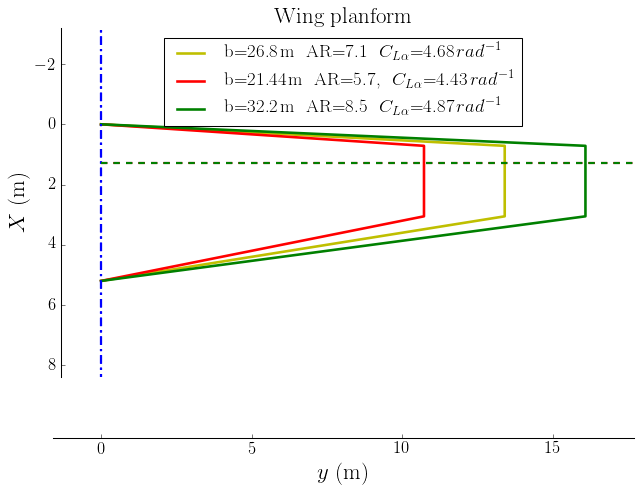

In [94]:
plot_planform_2(c_r,c_t,b,b1,b2,AR,AR1,AR2,CLalpha,CLalpha1,CLalpha2)